In [98]:
import numpy as np
import pandas as pd
from scipy.stats import ortho_group
from procrustes import orthogonal
from procrustes import orthogonal_2sided
import cv2 as cv2

In [99]:
# get location matrices

path = './dataFolder/procrustes/'

before = pd.read_csv(path + 'Results_beforeRotation.csv')
img1= cv2.imread(path + 'pattern.jpeg')
matrix_1 = before.loc[:,'X':'Y'].values
after = pd.read_csv(path + 'Results_after15Rotation.csv')
matrix_2 = after.loc[:, 'X':'Y'].values
img2 = cv2.imread(path + 'pattern_15rot.jpeg')

Text(0.5, 1.0, 'rotatedBy15deg')

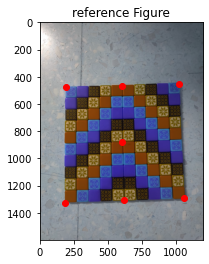

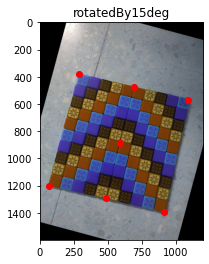

In [104]:
plt.imshow(img1)
plt.scatter(matrix_1[:,0], matrix_1[:,1], c='red')
plt.title('reference Figure')

f = plt.figure()
plt.imshow(img2)
plt.scatter(matrix_2[:,0], matrix_2[:,1], c='red')
plt.title('rotatedBy15deg')

In [105]:
# orthogonal Procrustes analysis with translation
result = orthogonal(matrix_2, matrix_1, scale=True, translate=True)
# # compute transformed matrix A (i.e., A x Q)
# aq = np.dot(result.new_a, result.t)

In [106]:
result

 error: 9.729461558308491e-05
 new_a: array([[-0.22539753, -0.37658529],
       [ 0.07756358, -0.3076458 ],
       [-0.00292793,  0.000905  ],
       [-0.07596653,  0.30498405],
       [ 0.24301836,  0.37951323],
       [-0.39047966,  0.2364172 ],
       [ 0.37418971, -0.23758837]])
 new_b: array([[-0.31437322, -0.30448482],
       [-0.00586574, -0.31378843],
       [-0.00363287, -0.00490879],
       [ 0.00430645,  0.31339874],
       [ 0.33278543,  0.30471513],
       [-0.3192111 ,  0.32853235],
       [ 0.30599105, -0.32346417]])
     s: None
     t: array([[ 0.96709445, -0.25441762],
       [ 0.25441762,  0.96709445]])

In [107]:
transformed_matrix_2 = np.dot(result.new_a, result.t)
transformed_matrix_2

array([[-0.31379063, -0.30684844],
       [-0.0032592 , -0.31725609],
       [-0.00260134,  0.00162014],
       [ 0.00412651,  0.3142756 ],
       [ 0.33157656,  0.30519698],
       [-0.31748201,  0.32798267],
       [ 0.30143013, -0.32497085]])

In [108]:
rot = result.t
z = np.zeros((2,1))
rot = np.append(rot, z, axis = 1) 
rot = np.append(rot, [[0,0,0]], axis=0)
# rot = np.append(rot, [[0,0,0]], axis = 1)
rot

array([[ 0.96709445, -0.25441762,  0.        ],
       [ 0.25441762,  0.96709445,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [109]:
from scipy.spatial.transform import Rotation   

## first transform the matrix to euler angles
r =  Rotation.from_matrix(rot)
angles = r.as_euler("zyx",degrees=True)

In [110]:
angles

array([19.67632174,  0.        ,  0.        ])

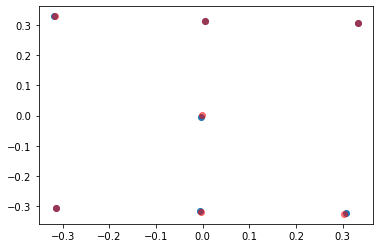

In [111]:
import matplotlib.pyplot as plt
plt.scatter(result.new_b[:,0], result.new_b[:,1])
plt.scatter(transformed_matrix_2[:,0], transformed_matrix_2[:,1], c= 'red', alpha = 0.5)